# This notebook is based on the exercise "California Housing Prices" in chapter 2 of the brilliant book "Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow" from A. Géron.

The training data in this case is a bit better cleaned than the training data from the example in chapter 2 of the book.Consequently, the trained Linear Regression Model (with default values) has a lower RMSE than the one from the book. Similarly, the Random Forest Regression Model has a lower RMSE than the one from the book. Fine-tuning the Random Forest Regression Model with "Grid Search Cross Validation" only leads to a very small improvement. Compared to the final RMSE from the book, the RMSE of the Test Set also shows a significant improvement. 

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
print('Python version info: ' + str(sys.version_info))

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
print('Scikit-Learn version: ' + sklearn.__version__ + '\n')

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

print('Matplotlib version: ' + matplotlib.__version__)
print('Numpy version: ' + np.__version__)
print('Pandas version: ' + pd.__version__)
print()

Python version info: sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
Scikit-Learn version: 0.21.3

Matplotlib version: 3.1.1
Numpy version: 1.16.5
Pandas version: 0.25.1



In [4]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Get a first impression of the dataset by using the methods ".head()", ".info()" and ".describe()"

In [6]:
df_housing = load_housing_data()
df_housing.head(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


In [7]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The column (feature) "total_bedrooms" doesn't have as many non-null elements as all the other columns.

In [8]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Get a first graphical impression of the columns containing numbers ...

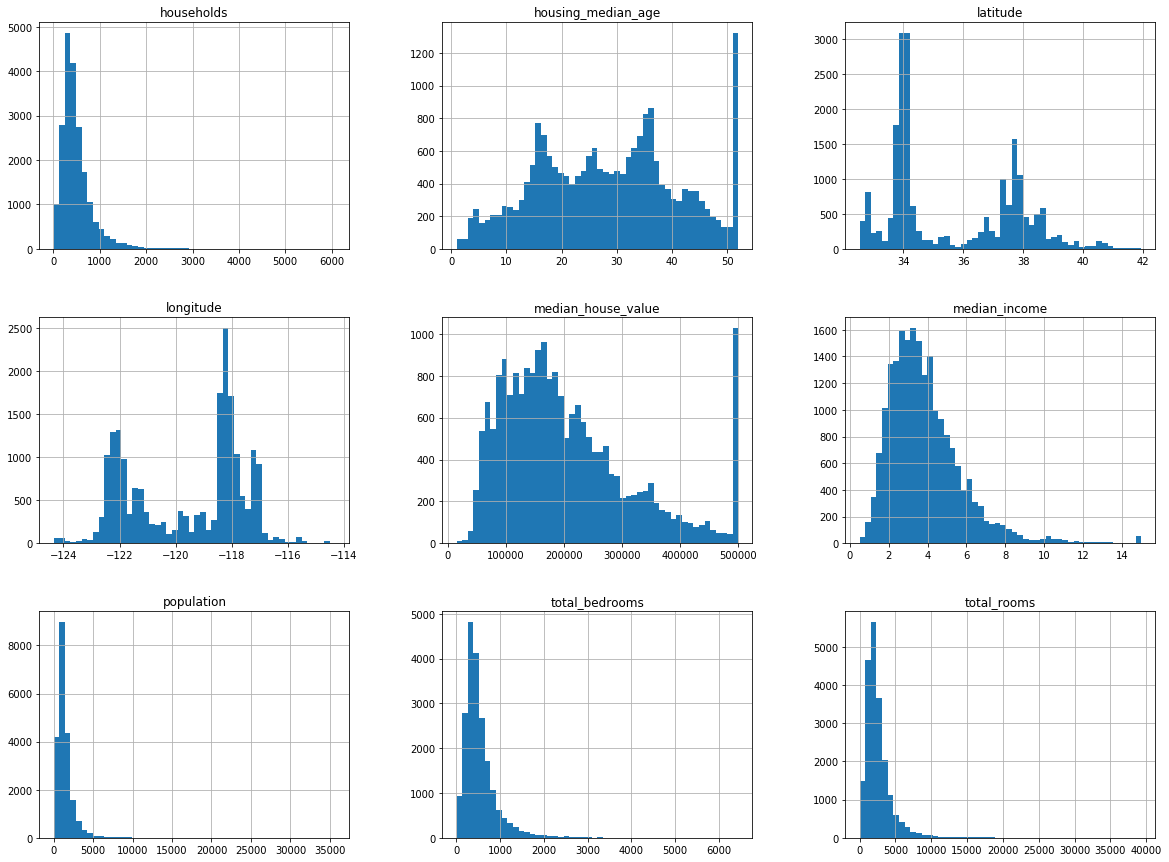

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df_housing.hist(bins=50, figsize=(20,15));

### ... and get a first impression of the column containing categories (Number of occurances of each category)

In [10]:
df_housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Data exploration

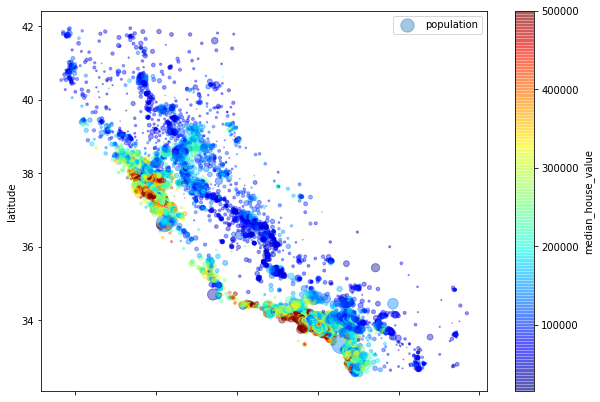

In [11]:
df_housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=df_housing['population']/100, label='population', figsize=(10,7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True);

In [12]:
corr_matrix = df_housing.corr()

In [13]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

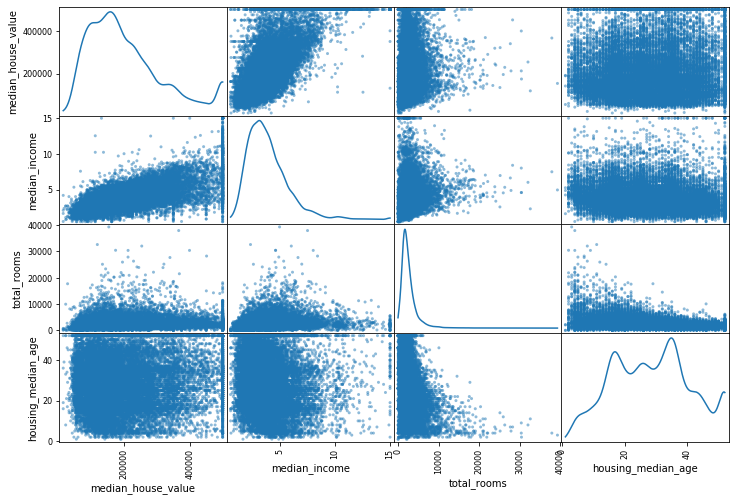

In [16]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(df_housing[attributes], diagonal='kde', figsize=(12, 8));

# Dealing with irregular data

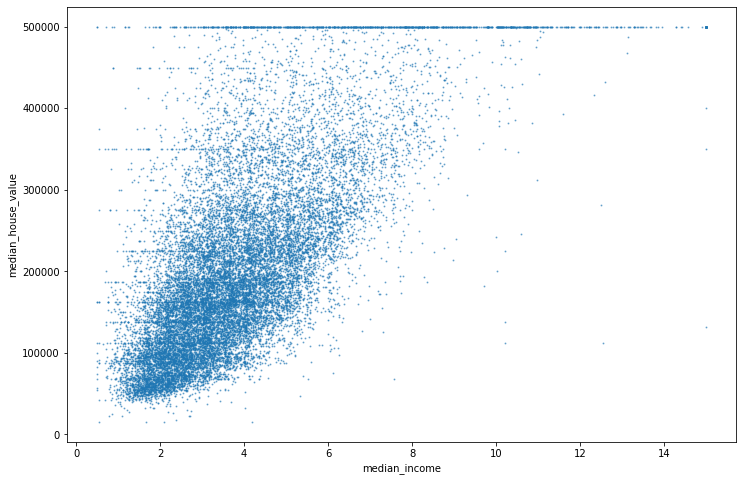

In [17]:
df_housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.5, s=1.0, figsize=(12, 8));

Clearly some **inconsistencies** at "median_house_value" approx. 500.000. Also at 450.000, 350.000, maybe 280.000, ...
This needs some further investigation:

### First: Find how many times specific "median_house_values" occur

In [18]:
medianhousevalue_occur = df_housing['median_house_value'].value_counts().sort_values()
df_housevalue_occur = pd.DataFrame({'occurances': medianhousevalue_occur})

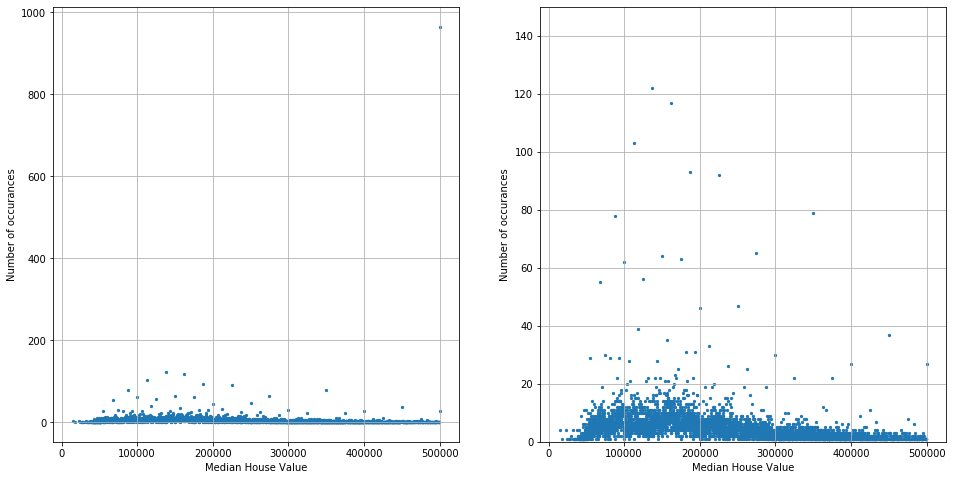

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
plt.gcf().set_size_inches(16, 8)
ax1.scatter(df_housevalue_occur.index, df_housevalue_occur['occurances'], s=5);
ax1.grid(True)
ax2.scatter(df_housevalue_occur.index, df_housevalue_occur['occurances'], s=5);
ax2.set_ylim(0, 150)
ax2.grid(True)
ax1.set_xlabel('Median House Value')
ax1.set_ylabel('Number of occurances')
ax2.set_xlabel('Median House Value')
ax2.set_ylabel('Number of occurances');

There seems to be certain "Median House Values" that occur significantly more often than others (=> **Outliers**)

### Second: Remove the Outliers (Outliers in this case: occurance > 25):

In [20]:
outliers = df_housing['median_house_value'].value_counts() > 25
outliers = outliers.index[outliers == True]
df_housing['bad'] = df_housing['median_house_value'].isin(outliers)

In [21]:
df_housing['bad'].value_counts()

False    18044
True      2596
Name: bad, dtype: int64

2596 rows are identified as outliers. (Their "median house value" occurs more often than 25 times.) These rows will be deleted.

In [22]:
df_housing_cleaned = df_housing[df_housing['bad'] == False]
df_housing_cleaned = df_housing_cleaned.reset_index(drop=True)

In [23]:
df_housing_cleaned = df_housing_cleaned.drop('bad', axis=1)
df_housing_cleaned.shape

(18044, 10)

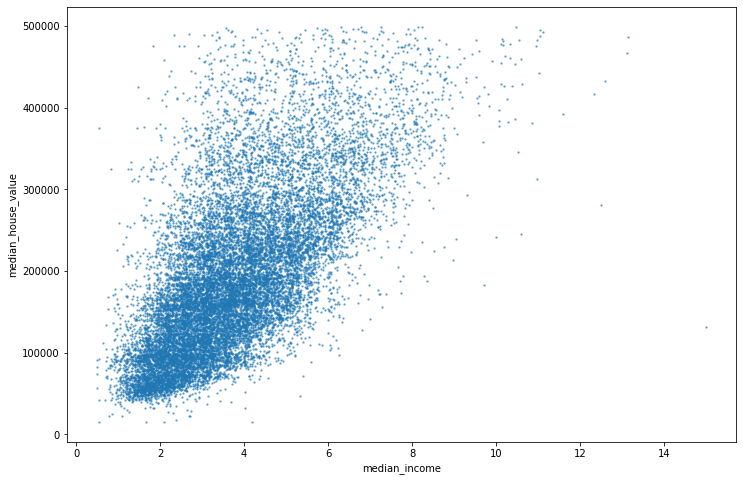

In [24]:
df_housing_cleaned.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.5, s=2.0, figsize=(12, 8));

<br>

# Feature Engineering (Attribute combinations, Categorical to Numerical Values)

### Create new features by combining existing features:
(Remember that the feature "total_bedrooms" does contain some NaN values, so any new features derived from "total_bedrooms" will contain NaN values as well.) <br>
How many NaN values does the feature (column) "total_bedrooms" contain?

In [25]:
df_housing_cleaned['total_bedrooms'].isna().sum()

186

The feature (column) "total_bedrooms" does not contain that many NaN values, so it's probably best to delete them (i.e. the entire row) :

In [26]:
df_housing_cleaned = df_housing_cleaned.dropna(subset=['total_bedrooms'])
df_housing_cleaned = df_housing_cleaned.reset_index(drop=True)
df_housing_cleaned.shape

(17858, 10)

In [27]:
df_housing_cleaned['rooms_per_household'] = df_housing_cleaned['total_rooms'] / df_housing_cleaned['households']
df_housing_cleaned['bedrooms_per_room'] = df_housing_cleaned['total_bedrooms'] / df_housing_cleaned['total_rooms']
df_housing_cleaned['population_per_household'] = df_housing_cleaned['population'] / df_housing_cleaned['households']

### Convert Categorical to Numerical Values
In order to make the machine learning algorithm understand the **categories of the feature "ocean_proximity"** they need to be **converted to values**:

In [29]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(df_housing_cleaned[['ocean_proximity']]).toarray()

In [30]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

These converted values need to go back into the dataframe "df_housing_cleaned" and the feature "ocean_proximity" needs to be deleted.

In [31]:
df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns=cat_encoder.categories_, dtype='int8')
df_housing_cleaned = pd.concat([df_housing_cleaned, df_cat_1hot], axis=1)
df_housing_cleaned = df_housing_cleaned.drop('ocean_proximity', axis=1)

### How do the new features correlate?

In [32]:
corr_matrix = df_housing_cleaned.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.673129
(<1H OCEAN,)                0.295340
(NEAR BAY,)                 0.157052
rooms_per_household         0.149132
total_rooms                 0.143222
(NEAR OCEAN,)               0.141896
households                  0.088769
total_bedrooms              0.068573
housing_median_age          0.062474
(ISLAND,)                   0.017072
population                  0.006312
longitude                  -0.045334
latitude                   -0.153978
population_per_household   -0.189214
bedrooms_per_room          -0.270259
(INLAND,)                  -0.511062
Name: median_house_value, dtype: float64

Compared to the values of the correlation matrix of the uncleaned data (see further above) the values have changed, of course. Some correlation values have increased, others have decreased. With "bedrooms_per_room" a new feature with a modest correlation value was created. Furthermore, the new features "population_per_household" and "rooms_per_household" are among the top correlation values (top values being absolute values different to zero). <br>
From the new feature "ocean_proximity" the category "INLAND" gives a relatively high correlation.

<br>

# Prepare the dataframe for Training

### Generate Train- and Test-Set by using Stratified Sampling
Stratified sampling is important to make sure that both the training and the test set represent a similar distribution of values. (Why "income_cat"? => Try with other features, especially "median_house_value"!)

In [33]:
df_housing_cleaned['income_cat'] = pd.cut(df_housing_cleaned['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

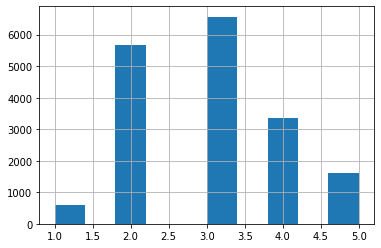

In [44]:
df_housing_cleaned['income_cat'].hist();

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

In [36]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_housing_cleaned, df_housing_cleaned['income_cat']):
    strat_train_set = df_housing_cleaned.loc[train_index]
    strat_test_set = df_housing_cleaned.loc[test_index]
strat_train_set = strat_train_set.reset_index(drop=True)
strat_test_set = strat_test_set.reset_index(drop=True)

In [37]:
distribution_test_set = strat_test_set['income_cat'].value_counts()/len(strat_test_set)

In [38]:
distribution_train_set = strat_train_set['income_cat'].value_counts()/len(strat_train_set)

In [39]:
distribution_overall = df_housing_cleaned['income_cat'].value_counts()/len(df_housing_cleaned)

In [46]:
pd.DataFrame({'Overall %': distribution_overall,
              'Test Set %': distribution_test_set,
              'Train Set %': distribution_train_set,
              'Test Set % Deviation': ((distribution_test_set - distribution_overall) / distribution_overall * 100),
              'Train Set % Deviation': ((distribution_train_set - distribution_overall) / distribution_overall * 100)
             }).sort_index()

,Overall %,Test Set %,Train Set %,Test Set % Deviation,Train Set % Deviation
1,0.034270,0.034155,0.034299,-0.337959,0.084502
2,0.318177,0.318309,0.318144,0.041594,-0.010400
3,0.367790,0.367861,0.367773,0.019249,-0.004813
4,0.188711,0.188690,0.188716,-0.011198,0.002800
5,0.091052,0.090985,0.091068,-0.072692,0.018176


In [41]:
# Remove the "income_cat" feature so that data is back in its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

### Seperate predictors and labels:

In [52]:
df_training, df_training_labels = strat_train_set.drop('median_house_value', axis=1), strat_train_set['median_house_value'].copy()
df_testing, df_testing_labels = strat_test_set.drop('median_house_value', axis=1), strat_test_set['median_house_value'].copy()
print(df_training.shape)
print(df_testing.shape)
df_training.head()

(14286, 16)
(3572, 16)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"
0,-117.89,33.99,22.0,3272.0,618.0,1784.0,591.0,4.0324,5.536379,0.188875,3.018613,1,0,0,0,0
1,-118.38,33.87,17.0,2791.0,579.0,1467.0,583.0,5.7415,4.787307,0.207453,2.516295,1,0,0,0,0
2,-121.36,38.57,26.0,1793.0,244.0,653.0,235.0,5.6485,7.629787,0.136085,2.778723,0,1,0,0,0
3,-118.47,34.00,28.0,1259.0,302.0,668.0,280.0,4.2813,4.496429,0.239873,2.385714,1,0,0,0,0
4,-123.17,39.15,30.0,1904.0,331.0,816.0,325.0,4.4250,5.858462,0.173845,2.510769,1,0,0,0,0


### Feature Scaling:
Machine learning algorithms don't perform well when the features have very different scales (see page 69). <br>
The categorical values of the feature "ocean_proximity" won't be scaled. Instead they are later concatenated in their original state.

In [53]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_training.iloc[:, 0:-5] = pd.DataFrame(standard_scaler.fit_transform(df_training.iloc[:, 0:-5]), columns=df_training.columns.values[0:-5])
df_testing.iloc[:, 0:-5] = pd.DataFrame(standard_scaler.fit_transform(df_testing.iloc[:, 0:-5]), columns=df_testing.columns.values[0:-5])
df_training.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"
0,0.834358,-0.775442,-0.500567,0.249014,0.157755,0.278720,0.204538,0.181206,0.064226,-0.433171,0.052981,1,0,0,0,0
1,0.589268,-0.831386,-0.902812,0.032730,0.065550,-0.007643,0.183625,1.276625,-0.316331,-0.050257,-0.407786,1,0,0,0,0
2,-0.901276,1.359771,-0.178772,-0.416025,-0.726466,-0.742973,-0.726062,1.217018,1.127756,-1.521290,-0.167065,0,1,0,0,0
3,0.544252,-0.770780,-0.017874,-0.656140,-0.589341,-0.729423,-0.608430,0.340734,-0.464108,0.617993,-0.527566,1,0,0,0,0
4,-1.806607,1.630169,0.143024,-0.366113,-0.520778,-0.595726,-0.490798,0.432836,0.227856,-0.742985,-0.412855,1,0,0,0,0


<br>

# Train a Linear Regression Model

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_training, df_training_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluate the Linear Regression Model by using several metrics

In [73]:
from sklearn.metrics import r2_score

lin_reg_predictions_train = lin_reg.predict(df_training)
lin_reg_predictions_test = lin_reg.predict(df_testing)
lin_reg_r2_train = r2_score(df_training_labels, lin_reg_predictions_train)
lin_reg_r2_test = r2_score(df_testing_labels, lin_reg_predictions_test)
print(f'R-Squared Train-Set: {lin_reg_r2_train:.3f}\nR-Squared Test-Set:  {lin_reg_r2_test:.3f}')

R-Squared Train-Set: 0.665
R-Squared Test-Set:  0.653


In [63]:
from sklearn.metrics import mean_squared_error

lin_reg_rmse_train = np.sqrt(mean_squared_error(df_training_labels, lin_reg_predictions_train))
lin_reg_rmse_test = np.sqrt(mean_squared_error(df_testing_labels, lin_reg_predictions_test))
print(f'RMSE Train-Set: {lin_reg_rmse_train:.1f}\nRMSE Test-Set:  {lin_reg_rmse_test:.1f}')

RMSE Train-Set: 56421.6
RMSE Test-Set:  58348.6


In [71]:
from sklearn.metrics import mean_absolute_error

lin_reg_mae_train = mean_absolute_error(df_training_labels, lin_reg_predictions_train)
lin_reg_mae_test = mean_absolute_error(df_testing_labels, lin_reg_predictions_test)
print(f'MAE Train-Set: {lin_reg_mae_train:.1f}\nMAE Test-Set:  {lin_reg_mae_test:.1f}')

MAE Train-Set: 41710.9
MAE Test-Set:  42448.0


### Visualization

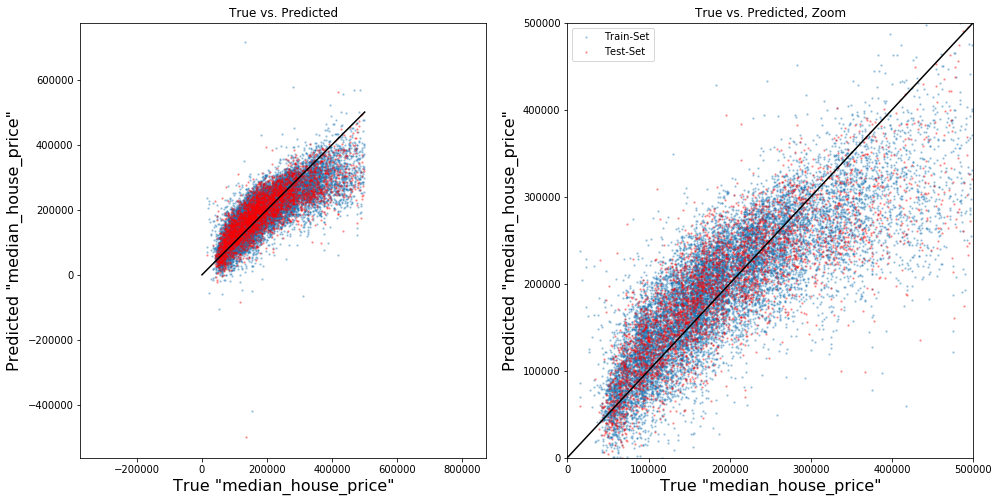

In [143]:
plt.rcParams.update({'axes.labelsize': 16})
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.scatter(df_training_labels, lin_reg_predictions_train, s=2, alpha=0.3)
ax1.scatter(df_testing_labels, lin_reg_predictions_test, s=2, alpha=0.3, color='red')
ax2.scatter(df_training_labels, lin_reg_predictions_train, s=2, alpha=0.3, label='Train-Set')
ax2.scatter(df_testing_labels, lin_reg_predictions_test, s=2, alpha=0.3, color='red', label='Test-Set')
ax1.plot([0, 500000], [0, 500000], color='black'); ax2.plot([0, 500000], [0, 500000], color='black')
ax1.axis('equal')
ax2.set_xlim([0, 500000]); ax2.set_ylim([0, 500000])
ax1.set_title('True vs. Predicted'); ax2.set_title(ax1.get_title() + "; Zoom")
ax1.set_xlabel('True \"median_house_price\"'); ax2.set_xlabel(ax1.get_xlabel())
ax1.set_ylabel('Predicted \"median_house_price\"'); ax2.set_ylabel(ax1.get_ylabel())
ax2.legend();

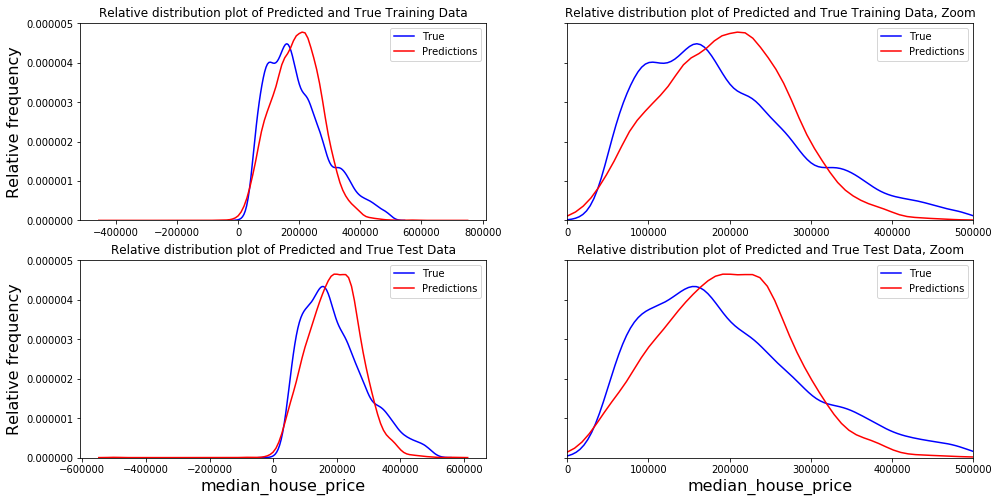

In [183]:
import seaborn as sns
f, ax = plt.subplots(2, 2, figsize=(16, 8), sharey=True)
sns.distplot(df_training_labels.values, hist=False, color="b", label='True', ax=ax[0, 0])
sns.distplot(lin_reg_predictions_train, hist=False, color="r", label='Predictions', ax=ax[0, 0])
sns.distplot(df_training_labels.values, hist=False, color="b", label='True', ax=ax[0, 1])
sns.distplot(lin_reg_predictions_train, hist=False, color="r", label='Predictions', ax=ax[0, 1])
sns.distplot(df_testing_labels.values, hist=False, color="b", label='True', ax=ax[1, 0])
sns.distplot(lin_reg_predictions_test, hist=False, color="r", label='Predictions', ax=ax[1, 0])
sns.distplot(df_testing_labels.values, hist=False, color="b", label='True', ax=ax[1, 1])
sns.distplot(lin_reg_predictions_test, hist=False, color="r", label='Predictions', ax=ax[1, 1])
ax[0, 1].set_xlim([-0, 500000]); ax[1, 1].set_xlim(ax[0, 1].get_xlim())
ax[0, 0].set_title('Relative distribution plot of Predicted and True Training Data'); ax[0, 1].set_title(ax[0, 0].get_title() + ", Zoom")
ax[1, 0].set_title('Relative distribution plot of Predicted and True Test Data'); ax[1, 1].set_title(ax[1, 0].get_title() + ", Zoom")
ax[1, 0].set_xlabel('median_house_price'); ax[1, 1].set_xlabel(ax[1, 0].get_xlabel())
ax[0, 0].set_ylabel('Relative frequency'); ax[1, 0].set_ylabel(ax[0, 0].get_ylabel());

### Evaluate by using "Cross-Validation"

In [65]:
from sklearn.model_selection import cross_val_score

scores_train = cross_val_score(lin_reg, df_training, df_training_labels, scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores_train = np.sqrt(-scores_train)
scores_test = cross_val_score(lin_reg, df_testing, df_testing_labels, scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores_test = np.sqrt(-scores_test)

In [66]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean:   ', scores.mean())
    print('Standard deviation:', scores.std())

In [67]:
print('TRAINING-SET evaluation:')
display_scores(lin_reg_rmse_scores_train)

TRAINING-SET evaluation:
Scores:  [54395.26728144 56555.2701199  56372.7328596  55987.84016008
 54732.55874123 58116.87546805 60384.87789025 58353.67195913
 55713.28458395 59670.40953135]
Mean:    57028.278859496735
Standard deviation: 1919.833385333657


In [68]:
print('TEST-SET evaluation:')
display_scores(lin_reg_rmse_scores_test)

TEST-SET evaluation:
Scores:  [53191.53194467 56193.76801517 52499.01634023 61312.42361114
 56240.82126224 57135.62968401 56081.30363456 59202.20159681
 53109.75051235 61084.25152534]
Mean:    56605.06981265269
Standard deviation: 3009.222257841983


Try with Regularization / Nonlinear

<br>

# Train a Random Forest Model and evaluate

In [44]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(df_training, df_training_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [45]:
housing_predictions_forest = forest_reg.predict(df_training)
forest_rmse = np.sqrt(mean_squared_error(df_training_labels, housing_predictions_forest))
forest_rmse

15719.137999752635

**Cross-validation:**

In [46]:
scores_forest = cross_val_score(forest_reg, df_training, df_training_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores_forest)
display_scores(forest_rmse_scores)

Scores:  [40704.18227796 42464.69490192 44982.76144294 41828.08199708
 40552.47769911 42727.00174455 39399.50464789 44814.33420554
 40632.50521147 43613.69640925]
Mean:    42171.9240537712
Standard deviation: 1797.4117860436772


# Grid search

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [10, 30, 60],
     'max_features': [2, 6, 10]},
    {'bootstrap': [False], 
     'n_estimators': [10, 30, 60],
     'max_features': [2, 6, 10]}
]

grid_search = GridSearchCV(forest_reg, 
                           param_grid, cv=5, 
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)
grid_search.fit(df_training, df_training_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 6, 10],
       

In [48]:
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(np.sqrt(-mean_score), params)

47554.73713355141 {'max_features': 2, 'n_estimators': 10}
45693.4574262414 {'max_features': 2, 'n_estimators': 30}
44781.809778064504 {'max_features': 2, 'n_estimators': 60}
44353.0995378177 {'max_features': 6, 'n_estimators': 10}
42616.180432468915 {'max_features': 6, 'n_estimators': 30}
42140.0944720921 {'max_features': 6, 'n_estimators': 60}
43939.31557272171 {'max_features': 10, 'n_estimators': 10}
42776.737743573525 {'max_features': 10, 'n_estimators': 30}
42385.681209343566 {'max_features': 10, 'n_estimators': 60}
46694.30492545264 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
44444.21324037225 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
43656.80215253489 {'bootstrap': False, 'max_features': 2, 'n_estimators': 60}
43012.218836984255 {'bootstrap': False, 'max_features': 6, 'n_estimators': 10}
41559.21272036113 {'bootstrap': False, 'max_features': 6, 'n_estimators': 30}
41203.302919163674 {'bootstrap': False, 'max_features': 6, 'n_estimators': 60}
4386

### Grid search 2. round

In [49]:
param_grid = [
    {'bootstrap': [False],
     'n_estimators': [60, 100, 140],
     'max_features': [4, 6, 8]}
]

grid_search = GridSearchCV(forest_reg, 
                           param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)
grid_search.fit(df_training, df_training_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'bootstrap': [False], 'max_features

In [50]:
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(np.sqrt(-mean_score), params)

41632.97565294409 {'bootstrap': False, 'max_features': 4, 'n_estimators': 60}
41506.58443952598 {'bootstrap': False, 'max_features': 4, 'n_estimators': 100}
41536.631644415465 {'bootstrap': False, 'max_features': 4, 'n_estimators': 140}
41203.302919163674 {'bootstrap': False, 'max_features': 6, 'n_estimators': 60}
41182.32407606105 {'bootstrap': False, 'max_features': 6, 'n_estimators': 100}
41126.79215539688 {'bootstrap': False, 'max_features': 6, 'n_estimators': 140}
41602.87333912587 {'bootstrap': False, 'max_features': 8, 'n_estimators': 60}
41445.50843891746 {'bootstrap': False, 'max_features': 8, 'n_estimators': 100}
41395.87851243914 {'bootstrap': False, 'max_features': 8, 'n_estimators': 140}


The improvement (decrease of the scoring measure) is marginal.

# Final Model

In [57]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(df_testing)
final_rmse = np.sqrt(mean_squared_error(df_testing_labels, final_predictions))
final_rmse

44175.79423930706

In [58]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - df_testing_labels) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([42396.42835455, 45886.21204812])